In [2]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np

%matplotlib notebook

In [3]:
# parser_data_directory should be set to the data-directory which the blocksci_parser output
chain = blocksci.Blockchain("/home/ubuntu/bitcoin-data")

__Examples of block features__

In [117]:
# number of transactions :
%time tx_counts = chain.map_blocks(lambda block: len(block.txes),start=0,end=510000)

CPU times: user 3.48 s, sys: 888 ms, total: 4.36 s
Wall time: 3min 46s


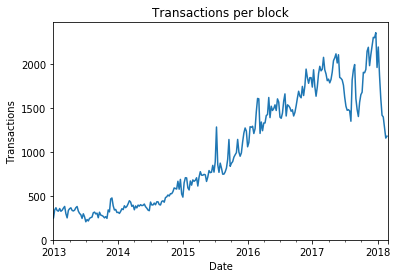

In [142]:
ax = (chain.heights_to_dates(pd.DataFrame(tx_counts).fillna(0))).resample("W").mean().plot()
ax.set_ylim(ymin=0)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions per block')
ax.set_xlim(['01/01/2013','03/01/2018'])
ax.legend_.remove()

In [118]:
# number of inputs
%time input_counts = chain.map_blocks(lambda block: block.input_count,start=0,end=510000)

CPU times: user 2.98 s, sys: 1 s, total: 3.99 s
Wall time: 4min 7s


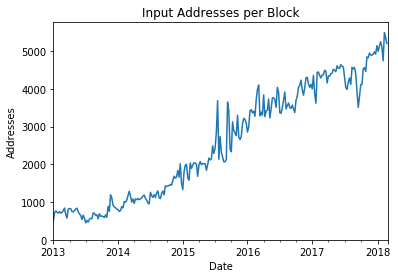

In [143]:
ax = (chain.heights_to_dates(pd.DataFrame(input_counts).fillna(0))).resample("W").mean().plot()
ax.set_ylim(ymin=0)
plt.xlabel('Date')
plt.ylabel('Addresses')
plt.title('Input Addresses per Block')
ax.set_xlim(['01/01/2013','03/01/2018'])
ax.legend_.remove()

In [119]:
# number of outputs
%time output_counts = chain.map_blocks(lambda block: block.output_count,start=0,end=510000)

CPU times: user 2.9 s, sys: 876 ms, total: 3.77 s
Wall time: 4min 35s


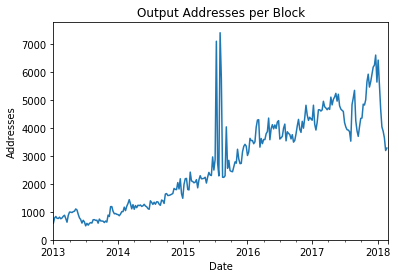

In [144]:
ax = (chain.heights_to_dates(pd.DataFrame(output_counts).fillna(0))).resample("W").mean().plot()
ax.set_ylim(ymin=0)
plt.xlabel('Date')
plt.ylabel('Addresses')
plt.title('Output Addresses per Block')
ax.set_xlim(['01/01/2013','03/01/2018'])
ax.legend_.remove()

The number of outputs and inputs has increased as the popularity of bitcoin has grown. But the ratio remains relatively constant:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


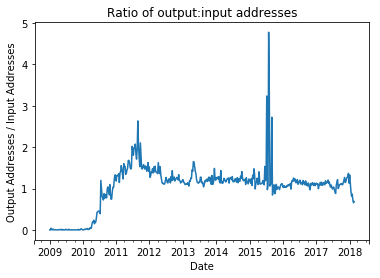

In [149]:
otoi = np.array(np.divide(output_counts,input_counts))
ax = (chain.heights_to_dates(pd.DataFrame(otoi).replace([np.inf, -np.inf], np.nan).fillna(0))).resample("W").mean().plot()
plt.xlabel('Date')
plt.ylabel('Output Addresses / Input Addresses')
plt.title('Ratio of output:input addresses')
ax.legend_.remove()

In [120]:
#value of a block
%time block_val = chain.map_blocks(lambda block: block.output_value,start=0,end=510000)

CPU times: user 3.24 s, sys: 976 ms, total: 4.22 s
Wall time: 4min


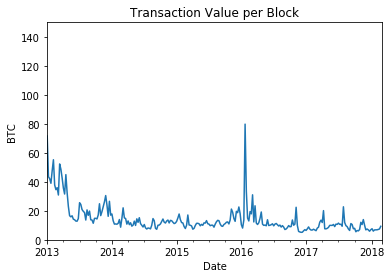

In [147]:
val_per_tx = np.divide(block_val,tx_counts)/1e8
ax = (chain.heights_to_dates(pd.DataFrame(val_per_tx).fillna(0))).resample("W").mean().plot()
ax.set_ylim(ymin=0)
plt.xlabel('Date')
plt.ylabel('BTC')
plt.title('Transaction Value per Block')
ax.set_xlim(['01/01/2013','03/01/2018'])
ax.set_ylim([0, 150])
ax.legend_.remove()

In [123]:
#address in two consecutive blocks
cstart = 1
cend = 510000
%time doubles = [len(set(n.outputs.address).intersection(n_1.outputs.address)) for n,n_1 in zip(chain[cstart:cend],chain[(cstart-1):(cend-1)])]

CPU times: user 40min 11s, sys: 3.97 s, total: 40min 15s
Wall time: 40min 27s


In [133]:
df_doubles = pd.DataFrame({'Addresses':doubles}).fillna(0)
df_doubles = chain.heights_to_dates(df_doubles)

(2245, 2506)

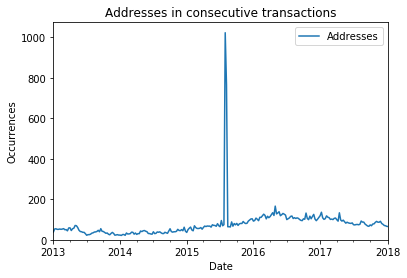

In [135]:
ax = df_doubles.resample("W").mean().plot()
ax.set_ylim(ymin=0)
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Addresses in consecutive transactions')
ax.set_xlim(['01/01/2013','01/01/2018'])

In [153]:
chain_features = pd.DataFrame(
    {'value': val_per_tx[1:],
     'out/in': otoi[1:],
     'consecutive': doubles
    })


Text(0.5,1,'Scatter plot - value vs. out/in ratio')

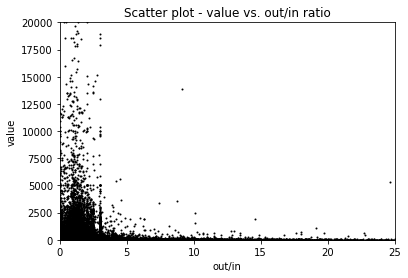

In [156]:
ax = chain_features.plot('out/in','value',kind='scatter',s=1,c='k')
ax.set_xlim([0,25])
ax.set_ylim([0,20000])
plt.title('Scatter plot - value vs. out/in ratio')

Text(0.5,1,'Scatter plot - consecutive addresses vs. out/in ratio')

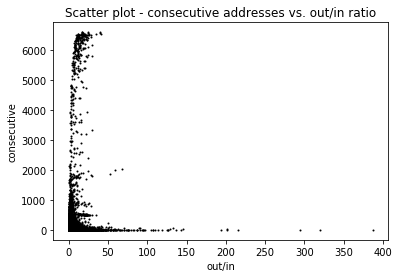

In [158]:
ax = chain_features.plot('out/in','consecutive',kind='scatter',s=1,c='k')
#ax.set_xlim([0,25])
#ax.set_ylim([0,20000])
plt.title('Scatter plot - consecutive addresses vs. out/in ratio')

__Transaction Features__

For each transaction (sample period for this test is the first half of 2017), get the following features:
- value
- fees paid
- number of input addresses
- number of output addresses
- block height 
- total size within the blockchain

In [5]:
# all the transactions in the first half of 2017
%time all_tx = chain.cpp.filter_tx("1", 443000, 470000) 

CPU times: user 2min 22s, sys: 3.23 s, total: 2min 25s
Wall time: 2min 34s


In [6]:
# get some properties of the transactions:
%time tx_values = [t.input_value/1e8 for t in all_tx]

CPU times: user 26.6 s, sys: 468 ms, total: 27.1 s
Wall time: 27.2 s


In [7]:
%time tx_fees = [t.fee/1e8 for t in all_tx]

CPU times: user 26.2 s, sys: 520 ms, total: 26.7 s
Wall time: 26.9 s


In [8]:
%time tx_inputs = [t.input_count for t in all_tx]

CPU times: user 19 s, sys: 0 ns, total: 19 s
Wall time: 19 s


In [9]:
%time tx_outputs = [t.output_count for t in all_tx]

CPU times: user 19.1 s, sys: 0 ns, total: 19.1 s
Wall time: 19.1 s


In [10]:
%time tx_height = [t.block_height for t in all_tx]

CPU times: user 19.6 s, sys: 680 ms, total: 20.3 s
Wall time: 20.3 s


In [11]:
%time tx_size = [t.total_size for t in all_tx]

CPU times: user 19.9 s, sys: 200 ms, total: 20.1 s
Wall time: 20.1 s


In [161]:
tx_features = pd.DataFrame(
    {'value': tx_values,
     'fee ratio': np.divide(tx_fees,tx_values),
     'out/in': np.divide(tx_inputs,tx_outputs),
     'IO difference' : np.subtract(tx_outputs,tx_inputs),
     'size': tx_size
    })

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
tx_features.index = tx_height
tx_features = tx_features.replace([np.inf, -np.inf], np.nan)
tx_features = chain.heights_to_dates(tx_features)
tx_features.head()

,IO difference,fee ratio,out/in,size,value
2017-05-17 06:55:22,1,NaN,0.0,163,0.000000
2017-05-17 06:55:22,-3,1.010271e-05,4.0,636,79.582572
2017-05-17 06:55:22,1,9.641352e-07,0.5,258,281.288350
2017-05-17 06:55:22,0,3.582786e-05,1.0,373,14.088477
2017-05-17 06:55:22,-2,2.340840e-05,3.0,582,21.359858


In [163]:
tx_features.mean()

IO difference      0.187925
fee ratio          0.025338
out/in             1.361258
size             490.968066
value              8.578285
dtype: float64

In [164]:
len(tx_features)

51289500

There are 51 million transactions in the window; sample every 1000th for plotting

In [169]:
reduced_tx=tx_features.iloc[::1000, :]

Text(0.5,1,'Ratio of fees to transaction values')

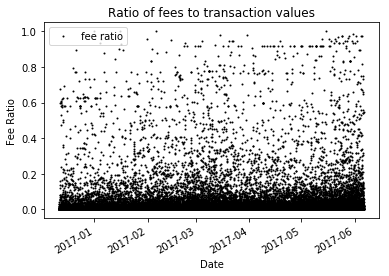

In [165]:
reduced_tx[['fee ratio']].plot(kind='line',style='ko',markersize=1)
plt.xlabel('Date')
plt.ylabel('Fee Ratio')
plt.title('Ratio of fees to transaction values')

Text(0.5,1,'Transaction Sizes')

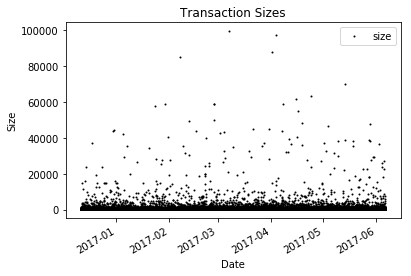

In [166]:
reduced_tx[['size']].plot(kind='line',style='ko',markersize=1)
plt.xlabel('Date')
plt.ylabel('Size')
plt.title('Transaction Sizes')

Text(0.5,1,'Scatter plot - size vs. fee ratio')

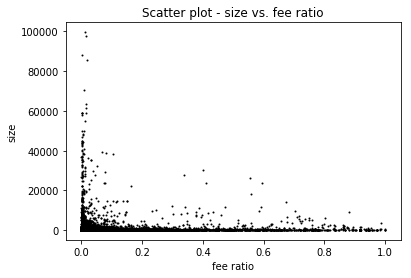

In [167]:
ax = reduced_tx.plot('fee ratio','size',kind='scatter',s=1,c='k')
plt.title('Scatter plot - size vs. fee ratio')

Text(0.5,1,'Scatter plot - Net change in addresses vs. Size')

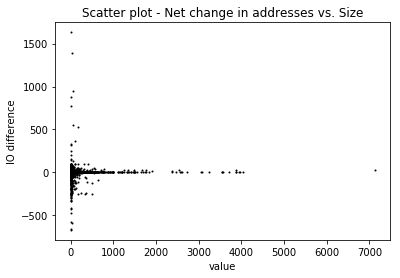

In [170]:
ax = reduced_tx.plot('value','IO difference',kind='scatter',s=1,c='k')
plt.title('Scatter plot - Net change in addresses vs. Size')

(-300, 0)

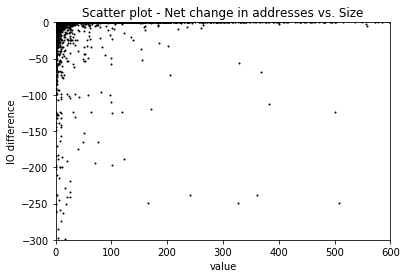

In [171]:
# zoom in on this plot:
ax = reduced_tx.plot('value','IO difference',kind='scatter',s=1,c='k')
plt.title('Scatter plot - Net change in addresses vs. Size')
ax.set_xlim([0,600])
ax.set_ylim([-300,0])

Look up the block containing the suspect transaction

In [186]:
tx_features2 = pd.DataFrame(
    {'value': tx_values,
     'fee ratio': np.divide(tx_fees,tx_values),
     'out/in': np.divide(tx_inputs,tx_outputs),
     'IO difference' : np.subtract(tx_outputs,tx_inputs),
     'size': tx_size
    })

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [187]:
tx_features2.index = tx_height
tx_features2 = tx_features2.replace([np.inf, -np.inf], np.nan)

In [188]:
reduced_tx2=tx_features2.iloc[::1000, :]
big_val = reduced_tx2['value'] > 500
big_dif = reduced_tx2['IO difference'] < -240
reduced_tx2[big_dif&big_val]

,IO difference,fee ratio,out/in,size,value
443932,-249,0.000047,250.0,36926,508.172164


This was block 443932, transaction e7f038f3ab7d061eaa1e6db4e89c840b3a984a8e15b509e432a83aaa21ecef70
See https://blockchain.info/tx/e7f038f3ab7d061eaa1e6db4e89c840b3a984a8e15b509e432a83aaa21ecef70